In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Load datasets
comments_df = pd.read_csv("comments.csv")
follows_df = pd.read_csv("follows.csv")
likes_df = pd.read_csv("likes.csv")
photo_tags_df = pd.read_csv("photo_tags.csv")
photos_df = pd.read_csv("photos.csv")
tags_df = pd.read_csv("tags.csv")
users_df = pd.read_csv("users.csv")

# Store datasets in a dictionary for easy access
datasets = {
    "Comments": comments_df,
    "Follows": follows_df,
    "Likes": likes_df,
    "Photo Tags": photo_tags_df,
    "Photos": photos_df,
    "Tags": tags_df,
    "Users": users_df
}

# Display the first few rows of each dataset
for name, df in datasets.items():
    print(f"\n📊 Dataset: {name}")
    display(df.head())  # Use display() in Jupyter to render DataFrames properly



📊 Dataset: Comments


,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1



📊 Dataset: Follows


,follower,followee,created time,is follower active,followee Acc status
0,2,1,13-04-2023 08:04,1,Private
1,2,3,13-04-2023 08:04,0,private
2,2,4,13-04-2023 08:04,0,public
3,2,5,13-04-2023 08:04,0,private
4,2,6,13-04-2023 08:04,1,private



📊 Dataset: Likes


,user,photo,created time,following or not,like type
0,2,1,13-04-2023 08:04,yes,heart emoji
1,2,4,13-04-2023 08:04,no,thumbs up
2,2,8,13-04-2023 08:04,yes,laughing
3,2,9,13-04-2023 08:04,no,fire
4,2,10,13-04-2023 08:04,yes,clap



📊 Dataset: Photo Tags


,photo,tag ID,user id
0,1,13,1
1,1,17,1
2,1,18,2
3,1,19,2
4,1,21,3



📊 Dataset: Photos


,id,image link,user ID,created dat,Insta filter used,photo type
0,1,http://elijah.biz,1,13-04-2023 08:04,yes,photo
1,2,https://shanon.org,1,13-04-2023 08:04,no,photo
2,3,http://vicky.biz,1,13-04-2023 08:04,no,photo
3,4,http://oleta.net,1,13-04-2023 08:04,no,photo
4,5,https://jennings.biz,1,13-04-2023 08:04,yes,photo



📊 Dataset: Tags


,id,tag text,created time,location
0,1,sunset,13-04-2023 08:04,florida
1,2,photography,13-04-2023 08:04,washington DC
2,3,sunrise,13-04-2023 08:04,new york
3,4,landscape,13-04-2023 08:04,london
4,5,food,13-04-2023 08:04,brazil



📊 Dataset: Users


,id,name,created time,private/public,post count,Verified status
0,1,Kenton_Kirlin,16-02-2017 18:22,yes,11,no
1,2,Andre_Purdy85,02-04-2017 17:11,no,7,no
2,3,Harley_Lind18,21-02-2017 11:12,no,2,no
3,4,Arely_Bogan63,13-08-2016 01:28,yes,1,no
4,5,Aniya_Hackett,07-12-2016 01:04,yes,3,no


In [19]:
# Standardize column names across datasets
comments_df.rename(columns={'User id': 'user_id', 'Photo id': 'photo_id', 'created Timestamp': 'created_at'}, inplace=True)
likes_df.rename(columns={'user': 'user_id', 'photo': 'photo_id', 'created time': 'created_at'}, inplace=True)
users_df.rename(columns={'created time': 'created_at', 'private/public': 'account_status'}, inplace=True)
follows_df.rename(columns={'follower': 'follower_id', 'followee': 'followee_id', 'created time': 'created_at'}, inplace=True)
photo_tags_df.rename(columns={'user id': 'user_id'}, inplace=True)
photos_df.rename(columns={'user ID': 'user_id', 'created dat': 'created_at'}, inplace=True)

# Convert 'created_at' columns to datetime format (with dayfirst=True)
date_columns = ['created_at']
for df in [comments_df, follows_df, likes_df, photos_df, users_df]:
    df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, errors='coerce', dayfirst=True))

print("\n✅ Date Parsing Completed without Warnings!")


# Check for missing values
for name, df in datasets.items():
    print(f"\n🔍 {name} Missing Values:\n{df.isnull().sum()}")

# Drop duplicates
for name, df in datasets.items():
    datasets[name] = df.drop_duplicates()

# Fill missing values
users_df.fillna({"account_status": "public", "post count": 0, "Verified status": "no"}, inplace=True)
comments_df.fillna({"comment": "No comment"}, inplace=True)

print("\n✅ Data Cleaning Completed!")



✅ Date Parsing Completed without Warnings!

🔍 Comments Missing Values:
id                     0
comment                0
User  id               0
photo_id               0
created_at             0
posted date            0
emoji used             0
Hashtags used count    0
dtype: int64

🔍 Follows Missing Values:
follower_id            0
followee               0
created_at             0
is follower active     0
followee Acc status    0
dtype: int64

🔍 Likes Missing Values:
user                0
photo_id            0
created_at          0
following or not    0
like type           0
dtype: int64

🔍 Photo Tags Missing Values:
photo      0
tag ID     0
user_id    0
dtype: int64

🔍 Photos Missing Values:
id                   0
image link           0
user_id              0
created_at           0
Insta filter used    0
photo type           0
dtype: int64

🔍 Tags Missing Values:
id              0
tag text        0
created time    0
location        0
dtype: int64

🔍 Users Missing Values:
id       

C:\Users\kevin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


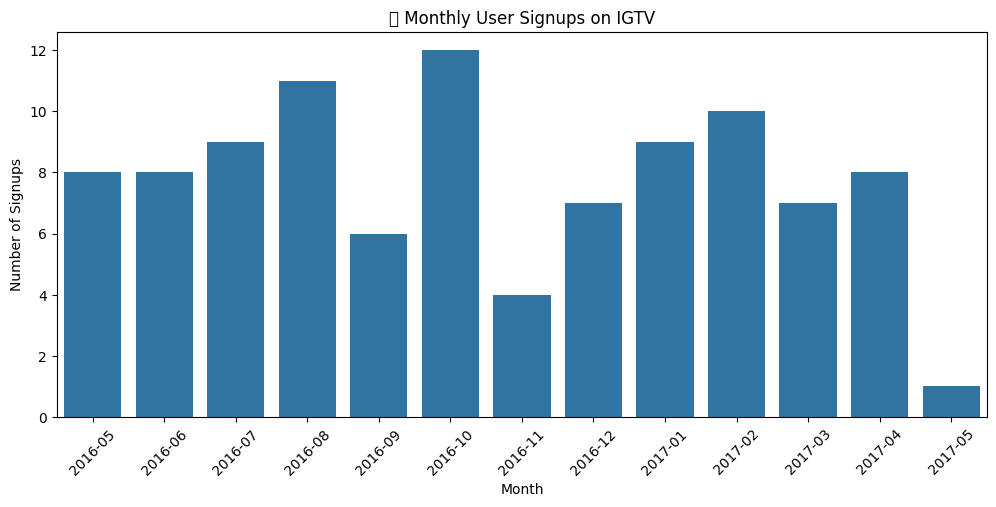

In [20]:
# Extract monthly signups
users_df['signup_month'] = users_df['created_at'].dt.to_period('M')

# Plot signups over time
plt.figure(figsize=(12, 5))
sns.countplot(x=users_df['signup_month'].astype(str), order=sorted(users_df['signup_month'].astype(str).unique()))
plt.xticks(rotation=45)
plt.title("📈 Monthly User Signups on IGTV")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()


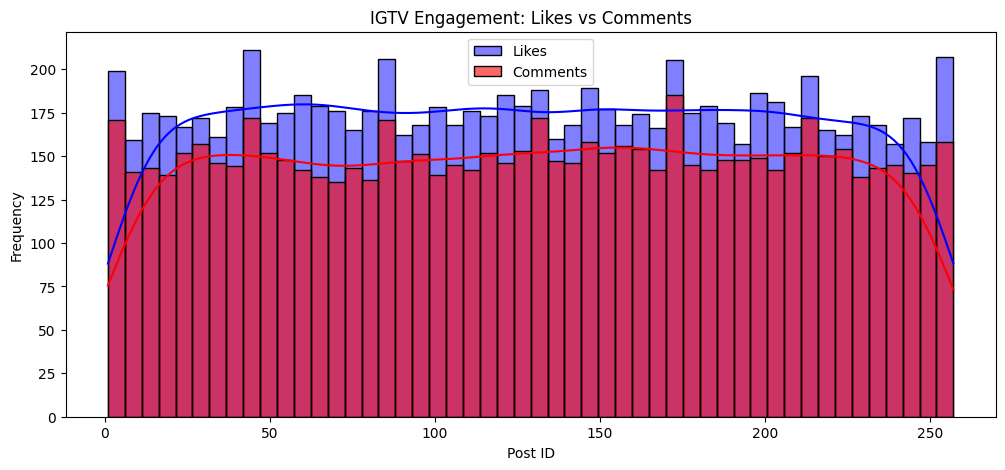

In [22]:
plt.figure(figsize=(12, 5))
sns.histplot(likes_df['photo'], bins=50, kde=True, color='blue', label='Likes')
sns.histplot(comments_df['Photo id'], bins=50, kde=True, color='red', label='Comments', alpha=0.6)
plt.legend()
plt.title("IGTV Engagement: Likes vs Comments")
plt.xlabel("Post ID")
plt.ylabel("Frequency")
plt.show()
